In [3]:
import pyarrow.feather as feather
import pandas as pd
# 设置 Pandas 显示选项
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.width', 200)       # 设置显示宽度，防止换行
pd.set_option('display.max_rows', 20)      # 只显示 20 行数据（可根据需要调整）
# 文件路径
file_path = "/mnt/nvme2/yyc/medical-coding/files/data/mimiciii_full/mimiciii_full.feather"
# 读取 feather 文件
data = feather.read_table(file_path)
# 转换为 pandas DataFrame
df = data.to_pandas()
# 打印数据框
print(df)

       subject_id     _id      DESCRIPTION                                               text                                             cpt_id                                          icd9_diag  \
0               3  145834           Report  admission date discharge date date of birth se...                                     [94002, 94003]  [785.59, 682.6, 425.4, 410.71, 038.9, 584.9, 4...   
1               4  185777           Report  admission date discharge date date of birth se...                [99233, 99223, 99238, 99231, 99232]  [E931.7, 799.4, 041.11, 136.3, 571.5, 790.7, 2...   
2               6  107064           Report  admission date discharge date date of birth se...         [99239, 99255, 99291, 99233, 99231, 99232]  [403.91, 276.6, 444.0, V15.82, 997.2, 276.7, 2...   
3               9  150750  Report+Addendum  admission date discharge date date of birth se...                                            [94003]           [276.5, 584.9, 431, 507.0, 401.9, 428.0]   
4    

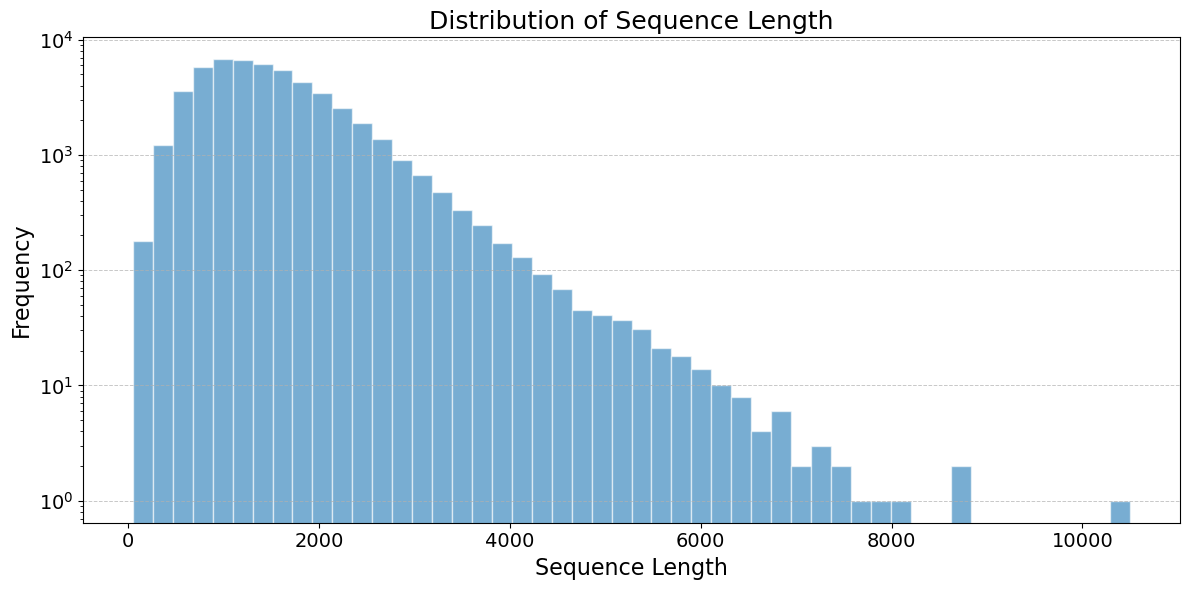

In [26]:
import matplotlib.pyplot as plt

# 可视化 num_words 的分布
plt.figure(figsize=(12, 6))

# 绘制直方图，调整颜色、透明度和边框
plt.hist(df['num_words'], bins=50, alpha=0.6, edgecolor='white', log=True)

# 添加标题和坐标轴标签，调整字体大小
plt.title('Distribution of Sequence Length', fontsize=18)  # 增大标题字体并加粗
plt.xlabel('Sequence Length', fontsize=16)  # 增大X轴标签字体
plt.ylabel('Frequency', fontsize=16)  # 增大Y轴标签字体

# 调整坐标轴刻度字体大小
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 添加网格线
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  # 水平网格线

# 自动调整布局避免重叠
plt.tight_layout()

# 显示图形
plt.show()

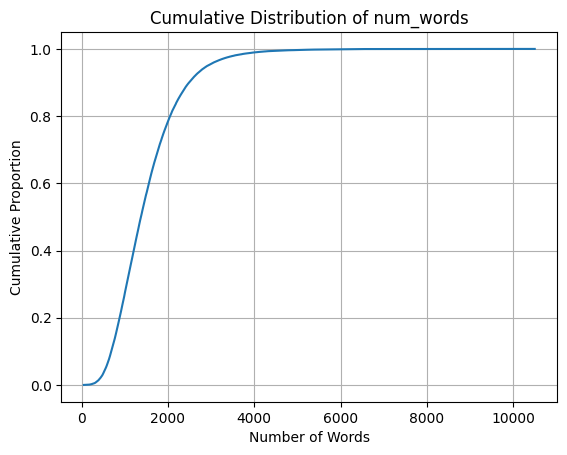

In [31]:
#累计分布函数（CDF）
distribution = df['num_words'].value_counts().sort_index()
cdf = distribution.cumsum() / distribution.sum()
plt.plot(cdf.index, cdf.values)
plt.xlabel('Number of Words')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Distribution of num_words')
plt.grid()
plt.show()


In [32]:
# 根据 num_words 添加难度标签
def assign_difficulty_by_words(num_words):
    if num_words <= 1500:
        return "easy"
    elif 1500 < num_words <= 3000:
        return "middle"
    else:
        return "hard"

# 应用划分逻辑
df['difficulty'] = df['num_words'].apply(assign_difficulty_by_words)
print(df)

# 保存为新文件
output_path = "/mnt/nvme2/yyc/medical-coding/files/data/mimiciii_full/mimiciii_full_difficulty_from_words.feather"
df.to_feather(output_path)


       subject_id     _id      DESCRIPTION                                               text                                             cpt_id                                          icd9_diag  \
0               3  145834           Report  admission date discharge date date of birth se...                                     [94003, 94002]  [263.9, 428.0, 425.4, 682.6, 410.71, 785.59, 0...   
1               4  185777           Report  admission date discharge date date of birth se...                [99231, 99238, 99232, 99233, 99223]  [042, V09.0, E931.7, 041.11, 571.5, 276.3, 136...   
2               6  107064           Report  admission date discharge date date of birth se...         [99231, 99239, 99291, 99232, 99233, 99255]  [276.6, 997.2, 285.9, V15.82, 275.3, 444.0, 40...   
3               9  150750  Report+Addendum  admission date discharge date date of birth se...                                            [94003]           [428.0, 401.9, 276.5, 507.0, 431, 584.9]   
4    

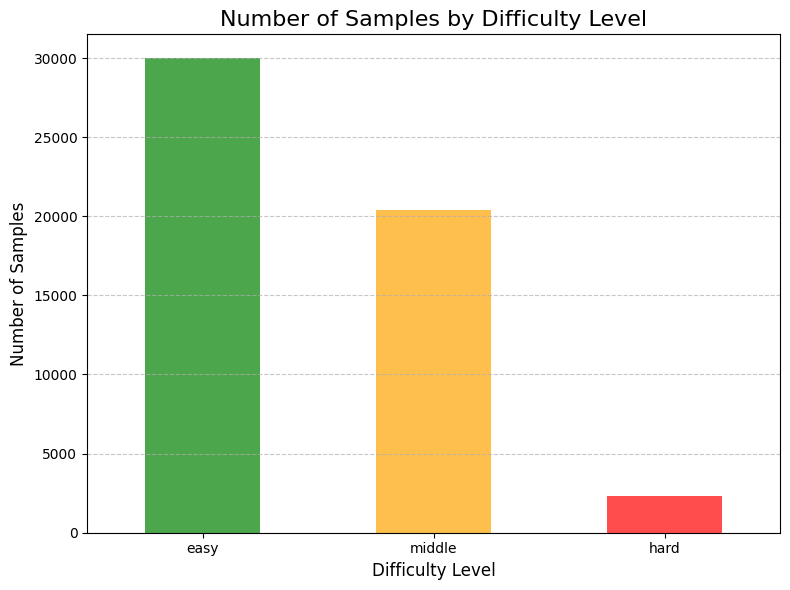

In [34]:
import matplotlib.pyplot as plt

# 确保按照 easy, middle, hard 的顺序排列
difficulty_order = ['easy', 'middle', 'hard']
difficulty_counts = df['difficulty'].value_counts().reindex(difficulty_order)

# 绘制柱状图可视化
plt.figure(figsize=(8, 6))
difficulty_counts.plot(kind='bar', color=['green', 'orange', 'red'], alpha=0.7)
plt.title('Number of Samples by Difficulty Level', fontsize=16)
plt.xlabel('Difficulty Level', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()